In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick import regressor



sns.set(style="white")
plt.rc('figure', figsize=[12, 5])
np.set_printoptions(precision=3)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
# test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(f'DataFrame    shape')
print(f'train_df   {train_df.shape}')
print(f'test_df    {test_df.shape}')

DataFrame    shape
train_df   (891, 12)
test_df    (418, 11)


In [7]:
# print(f'train_CABIN has {train_df.cabin.isna().sum()} null values and test_CABIN has {test_df.cabin.isna().sum()} null values')
# print(f'train_Age has {train_df.age.isna().sum()} null values and test_Age has {test_df.age.isna().sum()} null values')
# print(f'train_Embarked has {train_df.embarked.isna().sum()} null values and test_Embarked has {test_df.embarked.isna().sum()} null values')
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

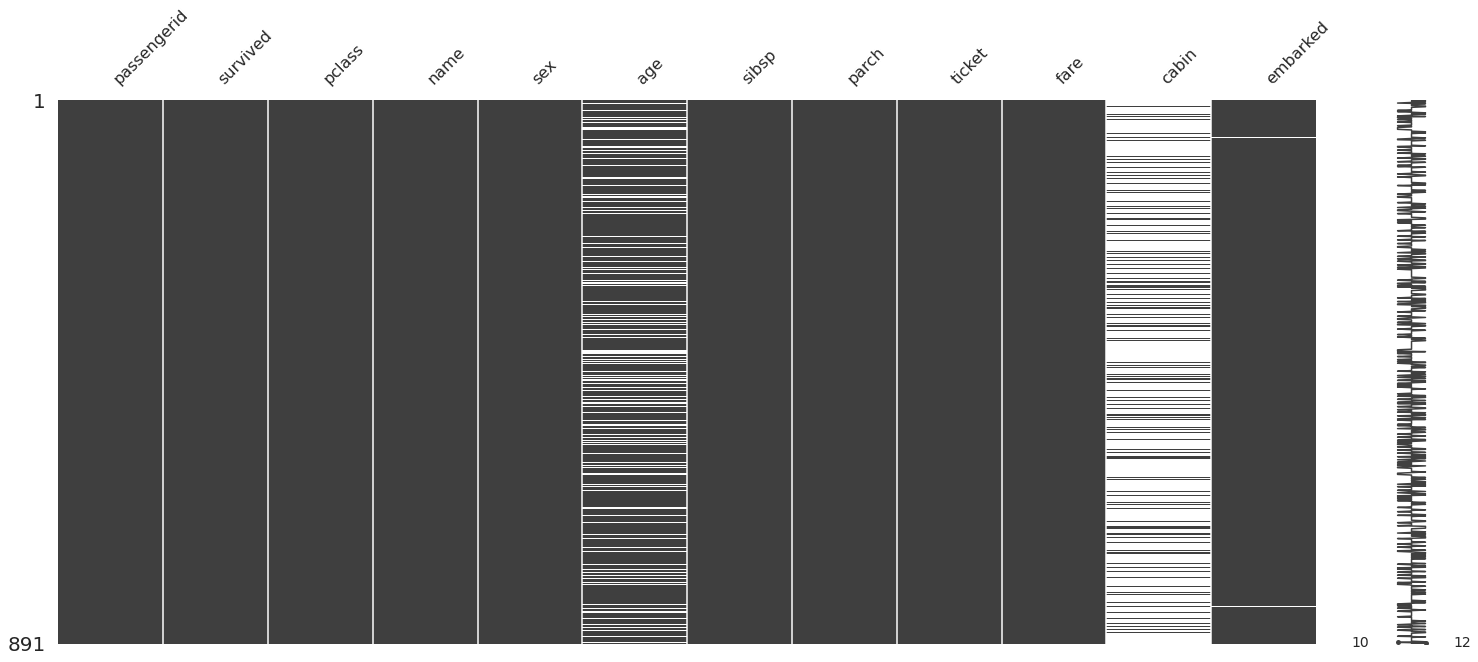

In [9]:
msno.matrix(train_df)

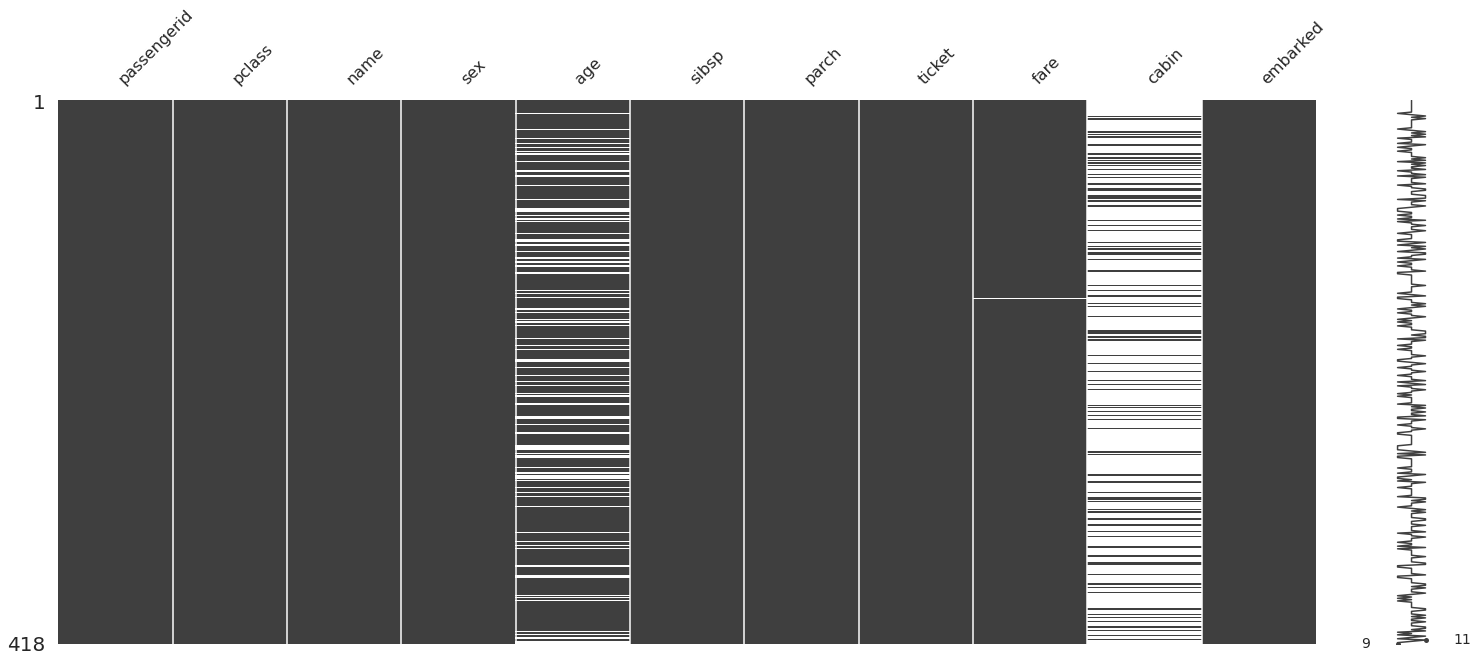

In [10]:
msno.matrix(test_df)

In [11]:
data = pd.concat((train_df,test_df))
data.shape

(1309, 12)

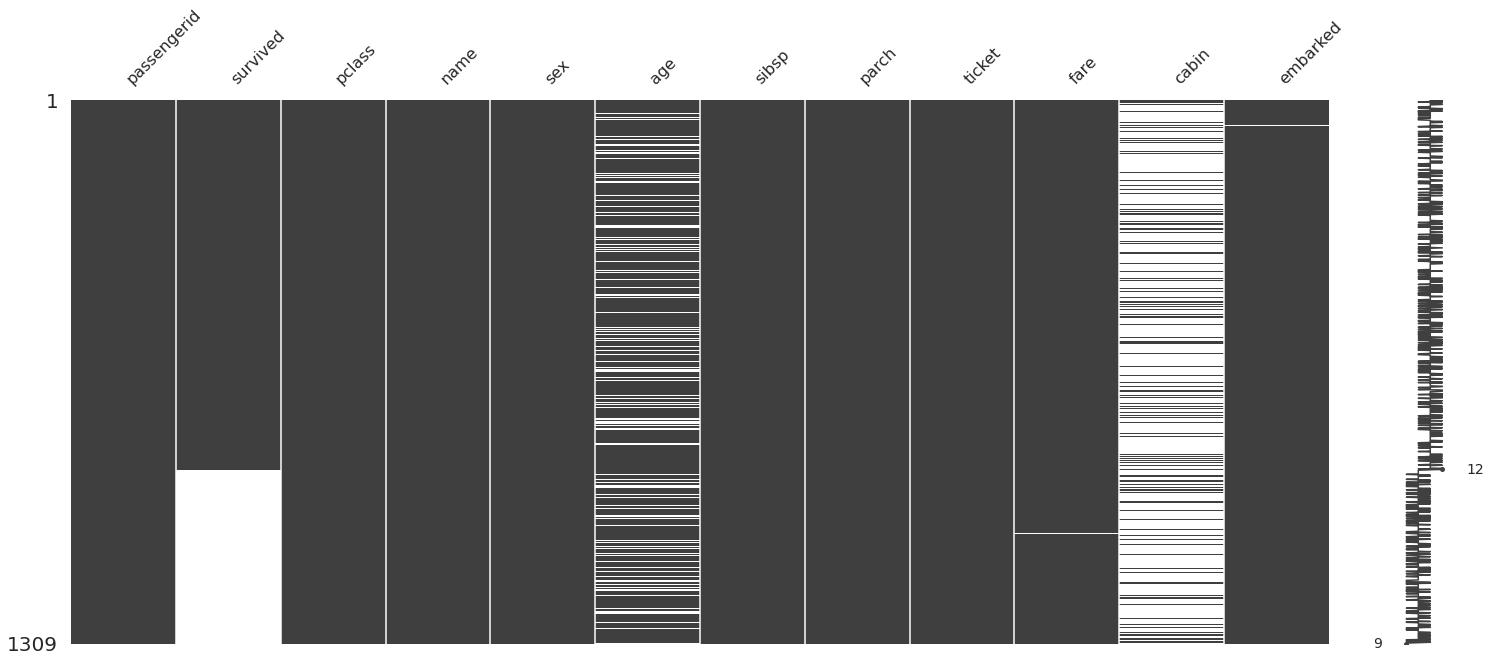

In [12]:
msno.matrix(data)

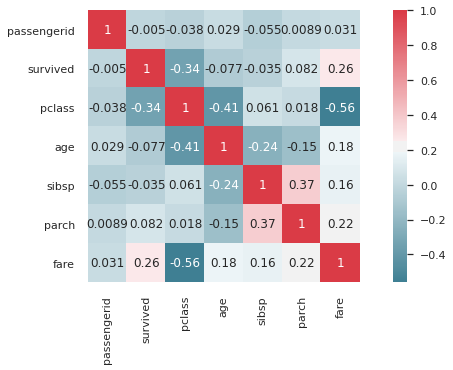

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(),cmap=cmap,annot=True,square=True)

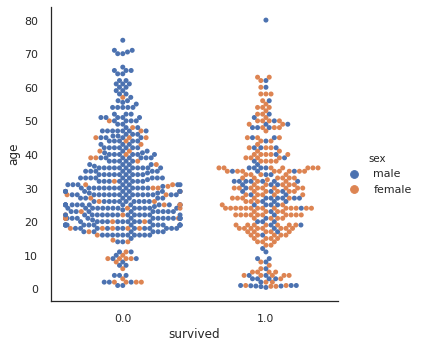

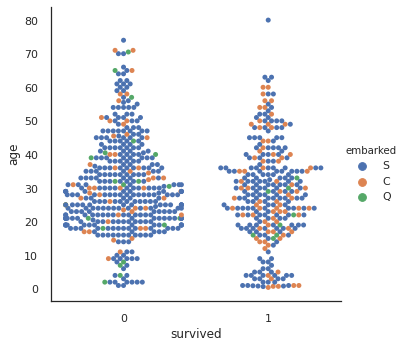

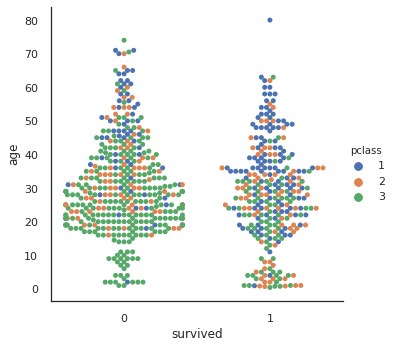

In [14]:
#float data visualization
# train_df['age'].value_counts().plot.pie(autopct='%1.1f%%')
sns.catplot(x='survived',y='age',hue='sex',kind='swarm',data=data)
sns.catplot(x='survived',y='age',hue='embarked',kind='swarm',data=train_df)
sns.catplot(x='survived',y='age',hue='pclass',kind='swarm',data=train_df)
# sns.catplot(x='survived',y='age',hue='parch',kind='swarm',data=train_df)
# sns.catplot(x='survived',y='age',hue='sibsp',kind='swarm',data=train_df)

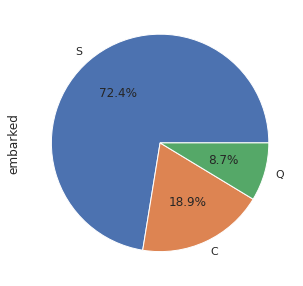

In [15]:
# train_df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
train_df['embarked'].value_counts().plot.pie(autopct='%1.1f%%')

AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)




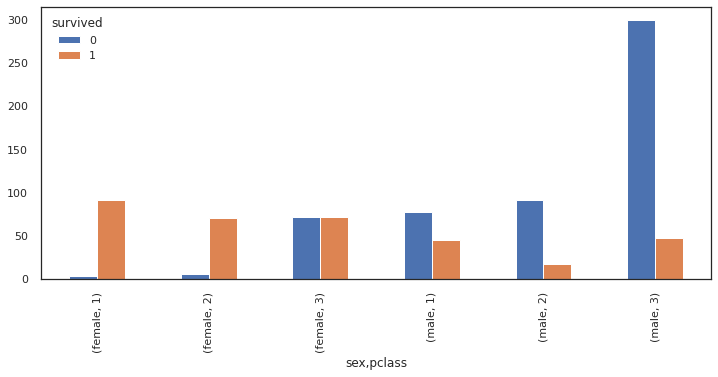

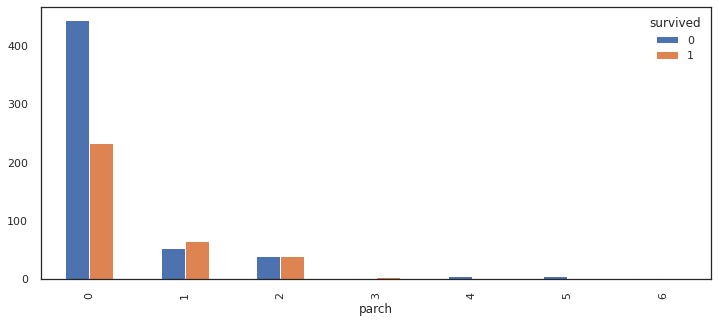

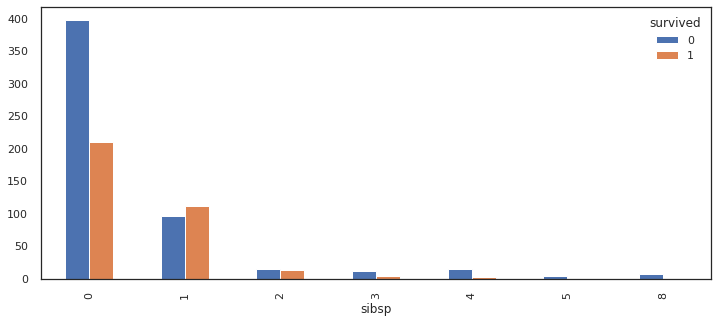

In [16]:
print(pd.crosstab([train_df['sex'],train_df['pclass']],train_df['survived'],margins=False).plot(kind='bar'))
print('\n')
print(pd.crosstab(train_df['parch'],train_df['survived']).plot(kind='bar'))
print('\n')
print(pd.crosstab(train_df['sibsp'],train_df['survived']).plot(kind='bar'))
print('\n')

In [17]:
# data[data['embarked']=='S'][['fare']].mean()
# data[data['pclass']==3][['fare']].mean()
# data[data['sex']=='male'][['fare']].mean()
# data[data['age']>=60][['fare']].mean()
# data[data['pclass']==3][['fare']].mean()
fare_to_replace = data[(data['pclass']==3)&(data['sex']=='male')&(data['embarked']=='S')&(data['age']>=60)][['fare']].dropna().mean()
fare_to_replace

fare    7.00625
dtype: float64

----------
AxesSubplot(0.125,0.125;0.775x0.755)


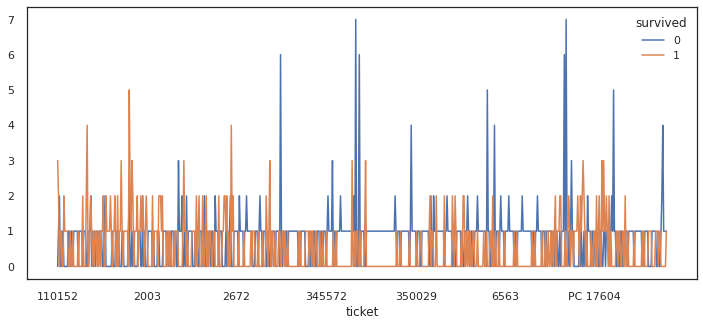

In [18]:
# print(train_df.groupby('ticket')['survived'].count())
print('-'*10)
print(pd.crosstab(train_df['ticket'],train_df['survived']).plot(kind='line'))

In [19]:
#prepare the TRAIN data  removing null, cat->num
train_df_1=train_df.copy()
train_df_1['age'].fillna(data['age'].mean(),inplace=True)    #fill null age to mean
train_df_1.drop(['passengerid','cabin','ticket','name'],axis=1,inplace=True)  #drop cabin because lot of null values 
#convert categorical var into numerical var
pclass_dummy = pd.get_dummies(train_df_1['pclass'],prefix='class')
sex_dummy=pd.get_dummies(train_df_1['sex'])
sibsp_dummy=pd.get_dummies(train_df_1['sibsp'],prefix='sibsp')
embarked_dummy=pd.get_dummies(train_df_1['embarked'])
parch_dummy=pd.get_dummies(train_df_1['parch'],prefix='parch')

In [20]:
#prepare the TEST  removing null, cat->num
test_df_1 = test_df.copy()
test_df_1['age'].fillna(data['age'].mean(),inplace=True)    #fill null age to mean
test_df_1.drop(['passengerid','cabin','ticket','name'],axis=1,inplace=True)  #drop cabin because lot of null values 
#convert categorical var into numerical var
test_pclass_dummy = pd.get_dummies(test_df_1['pclass'],prefix='class')
test_sex_dummy=pd.get_dummies(test_df_1['sex'])
test_sibsp_dummy=pd.get_dummies(test_df_1['sibsp'],prefix='sibsp')
test_embarked_dummy=pd.get_dummies(test_df_1['embarked'])
test_parch_dummy=pd.get_dummies(test_df_1['parch'],prefix='parch')

In [21]:
train_df_1.drop(['pclass','sex','sibsp','parch','embarked'],axis=1,inplace=True)
train_df_1 = train_df_1.join(sex_dummy)
train_df_1 = train_df_1.join(pclass_dummy)
train_df_1 = train_df_1.join(sibsp_dummy)
train_df_1 = train_df_1.join(parch_dummy)
train_df_1 = train_df_1.join(embarked_dummy)
train_df_1.head()

,survived,age,fare,female,male,class_1,class_2,class_3,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,C,Q,S
0,0,22.0,7.2500,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [22]:
test_df_1.drop(['pclass','sex','sibsp','parch','embarked'],axis=1,inplace=True)
test_df_1 = test_df_1.join(test_sex_dummy)
test_df_1 = test_df_1.join(test_pclass_dummy)
test_df_1 = test_df_1.join(test_sibsp_dummy)
test_df_1 = test_df_1.join(test_parch_dummy)
test_df_1 = test_df_1.join(test_embarked_dummy)
test_df_1.head()

,age,fare,female,male,class_1,class_2,class_3,sibsp_0,sibsp_1,sibsp_2,...,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,parch_9,C,Q,S
0,34.5,7.8292,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [23]:
#select X_train from "data"
X_train = train_df_1.drop('survived',axis=1)  
y_train = train_df_1['survived']

In [24]:
#i learned i can't drop fare so i am checking its name, class
test_df_1.iloc[152]

age        60.5
fare        NaN
female      0.0
male        1.0
class_1     0.0
class_2     0.0
class_3     1.0
sibsp_0     1.0
sibsp_1     0.0
sibsp_2     0.0
sibsp_3     0.0
sibsp_4     0.0
sibsp_5     0.0
sibsp_8     0.0
parch_0     1.0
parch_1     0.0
parch_2     0.0
parch_3     0.0
parch_4     0.0
parch_5     0.0
parch_6     0.0
parch_9     0.0
C           0.0
Q           0.0
S           1.0
Name: 152, dtype: float64

In [25]:
test_df_1['fare'].fillna(fare_to_replace.at['fare'],inplace=True)

In [26]:
X_test = test_df_1
X_test.drop('parch_9',axis=1,inplace=True)

In [27]:
#data transform
# scaler = StandardScaler()
# rescaled_Xtrain = scaler.fit_transform(X_train)
# rescaled_Xtest = scaler.transform(X_test)
#define the cv procedure
# kfold=KFold(n_splits=10,random_state=1)
#define the baseline model
model= KNeighborsClassifier()
model.fit(X_train,y_train)
#evaluate the model
# result = cross_val_score(model,rescaled_Xtrain,y_train,cv=kfold,scoring='accuracy')
#report the mean performance
# print(f'accuracy: {result.mean()*100.0}')


KNeighborsClassifier()

In [28]:
y_pred = model.predict(X_test)
model.score(X_train,y_train)

0.8047138047138047

In [29]:
submission= pd.DataFrame({'PassengerId':test_df['passengerid'],'survived':y_pred})
submission.to_csv('titanic_submission',header=True,index=False)

In [30]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "my.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')